# **HR ATTRITION ANALYTICS**

## **By Alfa Isa Dewa**

## **Business Understanding**

Project Context and Overview
 
**Stakeholders:**
- HR Department
- Senior Management
- Department Managers

**Problem Statement:**

Employee attrition is a significant challenge that impacts organizational productivity, knowledge retention, and costs. 
The HR department needs to understand the key factors driving employee turnover to develop targeted retention strategies. 
Based on the roles like "Research Scientist," "Laboratory Technician," and "Healthcare Representative," the company is most likely a Healthcare or Pharmaceutical company. This sector typically involves roles focused on medical research, product development, and sales of healthcare-related products.

**Goals:**
1. Analyze patterns and trends in employee attrition
2. Identify key factors and variables that contribute to employee turnover
3. Develop data-driven insights to help reduce attrition rates
4. Provide actionable recommendations for improving employee retention

This analysis will leverage HR data including employee demographics, job roles, satisfaction metrics, and other relevant factors
to help the organization make informed decisions about retention strategies.


## **Data Understanding**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


| **Column Name**             | **Meaning**                                                                                       |
|------------------------------|---------------------------------------------------------------------------------------------------|
| `Age`                       | The age of the employee.                                                                          |
| `Attrition`                 | Indicates if the employee has left the company (`Yes` or `No`).                                   |
| `BusinessTravel`            | Frequency of business travel (`Travel_Rarely`, `Travel_Frequently`, or `Non-Travel`).            |
| `DailyRate`                 | The daily rate of the employee's pay.                                                            |
| `Department`                | The department in which the employee works (`Sales`, `Research & Development`, or `Human Resources`). |
| `DistanceFromHome`          | The distance between the employee's home and workplace (in kilometers).                          |
| `Education`                 | The education level of the employee (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctorate). |
| `EducationField`            | The field of education (e.g., `Life Sciences`, `Medical`, `Marketing`).                          |
| `EmployeeCount`             | A constant column indicating the count of employees (always `1`).                                |
| `EmployeeNumber`            | A unique identifier for each employee.                                                           |
| `EnvironmentSatisfaction`   | Employee's satisfaction with the work environment (1: Low, 2: Medium, 3: High, 4: Very High).     |
| `Gender`                    | The gender of the employee (`Male` or `Female`).                                                 |
| `HourlyRate`                | The hourly rate of the employee's pay.                                                           |
| `JobInvolvement`            | The level of job involvement (1: Low, 2: Medium, 3: High, 4: Very High).                         |
| `JobLevel`                  | The level of the employee's job in the company hierarchy.                                         |
| `JobRole`                   | The role or designation of the employee (e.g., `Manager`, `Sales Executive`).                    |
| `JobSatisfaction`           | Employee's job satisfaction level (1: Low, 2: Medium, 3: High, 4: Very High).                    |
| `MaritalStatus`             | Marital status of the employee (`Single`, `Married`, or `Divorced`).                             |
| `MonthlyIncome`             | The monthly income of the employee.                                                              |
| `MonthlyRate`               | The monthly rate of the employee's pay.                                                          |
| `NumCompaniesWorked`        | The number of companies the employee has worked for.                                             |
| `Over18`                    | Indicates if the employee is over 18 years old (always `Yes`).                                   |
| `OverTime`                  | Indicates if the employee works overtime (`Yes` or `No`).                                        |
| `PercentSalaryHike`         | Percentage increase in the employee's salary during the last hike.                               |
| `PerformanceRating`         | The performance rating of the employee (1: Low, 2: Good, 3: Excellent, 4: Outstanding).          |
| `RelationshipSatisfaction`  | Employee's satisfaction with their relationships (1: Low, 2: Medium, 3: High, 4: Very High).      |
| `StandardHours`             | The standard number of working hours (always `80`).                                              |
| `StockOptionLevel`          | The stock option level granted to the employee.                                                  |
| `TotalWorkingYears`         | Total years the employee has worked.                                                             |
| `TrainingTimesLastYear`     | The number of training sessions the employee attended last year.                                 |
| `WorkLifeBalance`           | Employee's work-life balance (1: Bad, 2: Good, 3: Better, 4: Best).                              |
| `YearsAtCompany`            | The number of years the employee has been at the company.                                        |
| `YearsInCurrentRole`        | The number of years the employee has worked in their current role.                               |
| `YearsSinceLastPromotion`   | The number of years since the employee's last promotion.                                         |
| `YearsWithCurrManager`      | The number of years the employee has worked with their current manager.                          |

In [44]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## **Data Cleaning**

In [46]:
# Drop redundant columns
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [47]:
# Rename columns to more readable format
df = df.rename(columns={
    'BusinessTravel': 'Business_Travel',
    'DailyRate': 'Daily_Rate', 
    'DistanceFromHome': 'Distance_From_Home',
    'EducationField': 'Education_Field',
    'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobInvolvement': 'Job_Involvement',
    'JobLevel': 'Job_Level',
    'JobRole': 'Job_Role',
    'JobSatisfaction': 'Job_Satisfaction',
    'MonthlyIncome': 'Monthly_Income',
    'MonthlyRate': 'Monthly_Rate',
    'NumCompaniesWorked': 'Num_Companies_Worked',
    'OverTime': 'Over_Time',
    'PercentSalaryHike': 'Percent_Salary_Hike',
    'PerformanceRating': 'Performance_Rating',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'StockOptionLevel': 'Stock_Option_Level',
    'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year',
    'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Curr_Manager'
})

df.head()

,Age,Attrition,Business_Travel,Daily_Rate,Department,Distance_From_Home,Education,Education_Field,Environment_Satisfaction,Gender,...,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [48]:
# Drop duplicates
df = df.drop_duplicates()

In [49]:
# Check for null values
print("Null values in dataset:")
print(df.isnull().sum())

Null values in dataset:
Age                           0
Attrition                     0
Business_Travel               0
Daily_Rate                    0
Department                    0
Distance_From_Home            0
Education                     0
Education_Field               0
Environment_Satisfaction      0
Gender                        0
HourlyRate                    0
Job_Involvement               0
Job_Level                     0
Job_Role                      0
Job_Satisfaction              0
MaritalStatus                 0
Monthly_Income                0
Monthly_Rate                  0
Num_Companies_Worked          0
Over_Time                     0
Percent_Salary_Hike           0
Performance_Rating            0
Relationship_Satisfaction     0
Stock_Option_Level            0
Total_Working_Years           0
Training_Times_Last_Year      0
Work_Life_Balance             0
Years_At_Company              0
Years_In_Current_Role         0
Years_Since_Last_Promotion    0
Years_With_Curr_

There's not any missing value

In [50]:
df[['Attrition', 'Business_Travel', 'Gender', 'Over_Time']]

,Attrition,Business_Travel,Gender,Over_Time
0,Yes,Travel_Rarely,Female,Yes
1,No,Travel_Frequently,Male,No
2,Yes,Travel_Rarely,Male,Yes
3,No,Travel_Frequently,Female,Yes
4,No,Travel_Rarely,Male,No
...,...,...,...,...
1465,No,Travel_Frequently,Male,No
1466,No,Travel_Rarely,Male,No
1467,No,Travel_Rarely,Male,Yes
1468,No,Travel_Frequently,Male,No


In [51]:
# Additional transformations:
# Convert categorical variables to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Business_Travel'] = df['Business_Travel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Over_Time'] = df['Over_Time'].map({'Yes': 1, 'No': 0})  # Fixed column name from Over_Time to OverTime

In [52]:
df[['Attrition', 'Business_Travel', 'Gender', 'Over_Time']]

,Attrition,Business_Travel,Gender,Over_Time
0,1,1,0,1
1,0,2,1,0
2,1,1,1,1
3,0,2,0,1
4,0,1,1,0
...,...,...,...,...
1465,0,2,1,0
1466,0,1,1,0
1467,0,1,1,1
1468,0,2,1,0


In [53]:
# Print shape of cleaned dataset
print("\nShape of cleaned dataset:", df.shape)


Shape of cleaned dataset: (1470, 31)


In [55]:
# Check data types of all columns
print("Data types of all columns:")
print(df.dtypes)

# Identify non-numeric columns that should be numeric
non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("\nColumns that may need type conversion:")
    print(non_numeric_cols)

Data types of all columns:
Age                            int64
Attrition                      int64
Business_Travel                int64
Daily_Rate                     int64
Department                    object
Distance_From_Home             int64
Education                      int64
Education_Field               object
Environment_Satisfaction       int64
Gender                         int64
HourlyRate                     int64
Job_Involvement                int64
Job_Level                      int64
Job_Role                      object
Job_Satisfaction               int64
MaritalStatus                 object
Monthly_Income                 int64
Monthly_Rate                   int64
Num_Companies_Worked           int64
Over_Time                      int64
Percent_Salary_Hike            int64
Performance_Rating             int64
Relationship_Satisfaction      int64
Stock_Option_Level             int64
Total_Working_Years            int64
Training_Times_Last_Year       int64
Work_Life_B

In [56]:
df[['Department', 'Education_Field', 'Job_Role', 'MaritalStatus']]

,Department,Education_Field,Job_Role,MaritalStatus
0,Sales,Life Sciences,Sales Executive,Single
1,Research & Development,Life Sciences,Research Scientist,Married
2,Research & Development,Other,Laboratory Technician,Single
3,Research & Development,Life Sciences,Research Scientist,Married
4,Research & Development,Medical,Laboratory Technician,Married
...,...,...,...,...
1465,Research & Development,Medical,Laboratory Technician,Married
1466,Research & Development,Medical,Healthcare Representative,Married
1467,Research & Development,Life Sciences,Manufacturing Director,Married
1468,Sales,Medical,Sales Executive,Married


No need to convert these columns above.

## **Data Analysis**

### Numeric Column Heatmap

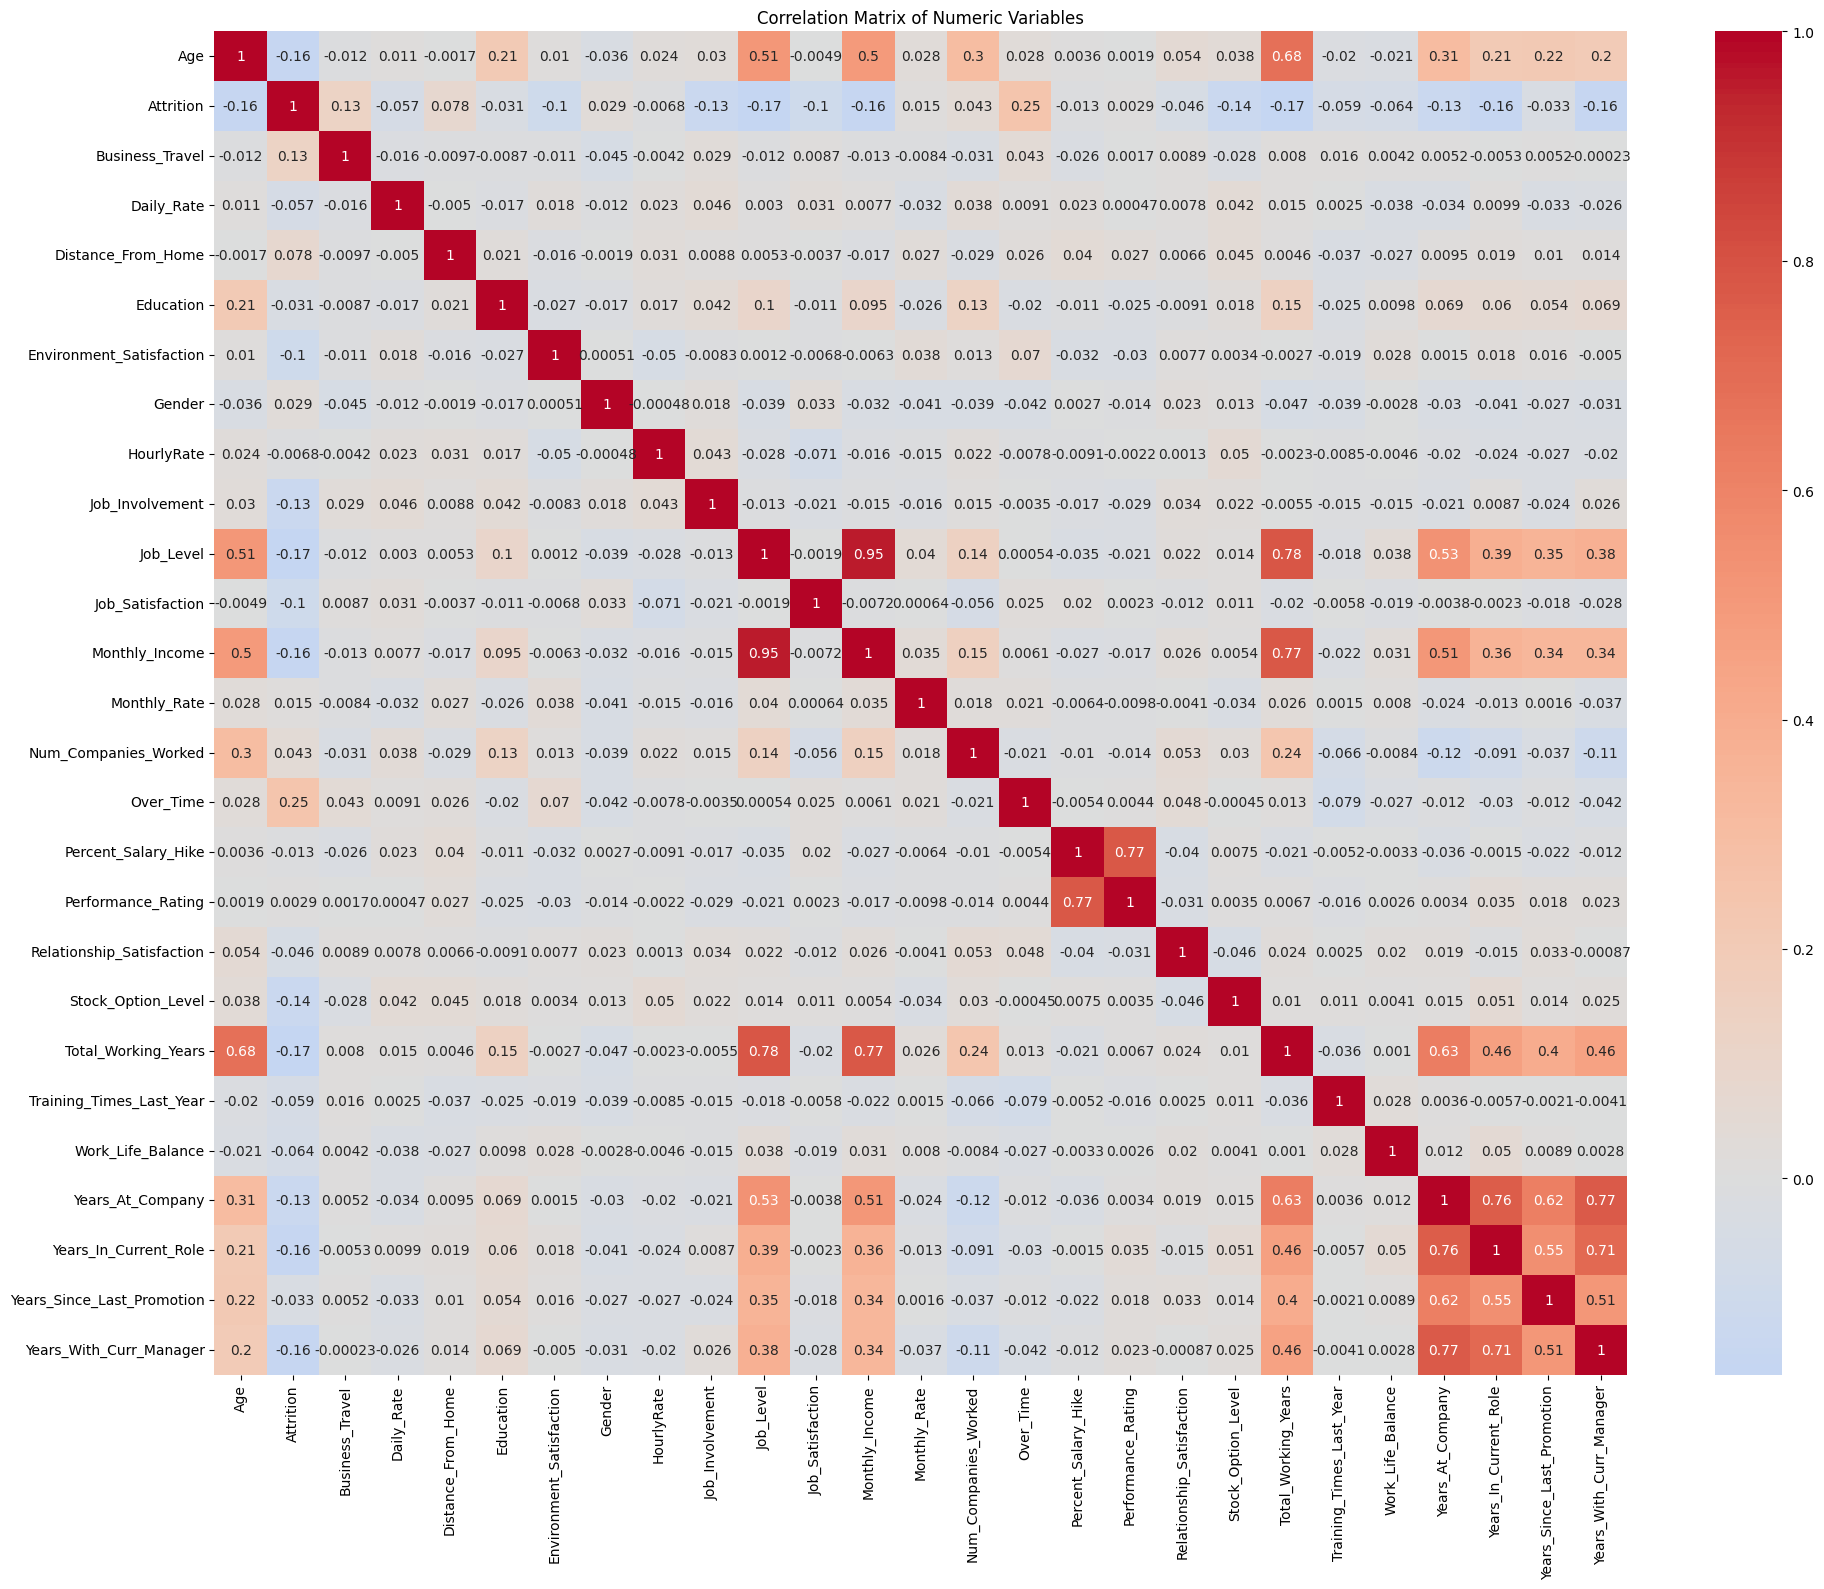

In [57]:
# Create correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

In [58]:
correlation_matrix

,Age,Attrition,Business_Travel,Daily_Rate,Distance_From_Home,Education,Environment_Satisfaction,Gender,HourlyRate,Job_Involvement,...,Performance_Rating,Relationship_Satisfaction,Stock_Option_Level,Total_Working_Years,Training_Times_Last_Year,Work_Life_Balance,Years_At_Company,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Curr_Manager
Age,1.000000,-0.159205,-0.011807,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.127006,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Business_Travel,-0.011807,0.127006,1.000000,-0.015539,-0.009696,-0.008670,-0.011310,-0.044896,-0.004164,0.029300,...,0.001683,0.008926,-0.028257,0.007972,0.016357,0.004209,0.005212,-0.005336,0.005222,-0.000229
Daily_Rate,0.010661,-0.056652,-0.015539,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Distance_From_Home,-0.001686,0.077924,-0.009696,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.008670,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
Environment_Satisfaction,0.010146,-0.103369,-0.011310,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.044896,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,-0.004164,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Job_Involvement,0.029820,-0.130016,0.029300,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


**Strong Correlations:**
- Job Level and Monthly Income (0.95): 
    + Employees in higher job levels are paid substantially more than those in lower levels.
- Years at Company and Years with Current Manager (0.77): 
    + Employees who stay longer at a company are likely to have worked longer with their current manager.
- Total Working Years and Job Level (0.78): 
    + Which suggests that as employees gain more work experience, they are likely to attain higher job levels.
- Total Working Years and Monthly Income (0.77): 
    + Showing that employees with more experience tend to earn higher monthly incomes.

**Moderate Correlations:**
- Age and Total Working Years (0.68):
    + The correlation is 0.68, suggesting that older employees generally have more work experience.
- Years at Company and Years Since Last Promotion (0.62):
    + Employees who have been with the company longer tend to have more years since their last promotion.
- Years Since Last Promotion and Years in Current Role (0.55):
    + Employees who have not been promoted for a longer period often tend to stay in their current role for longer.


### Overtime Analysis

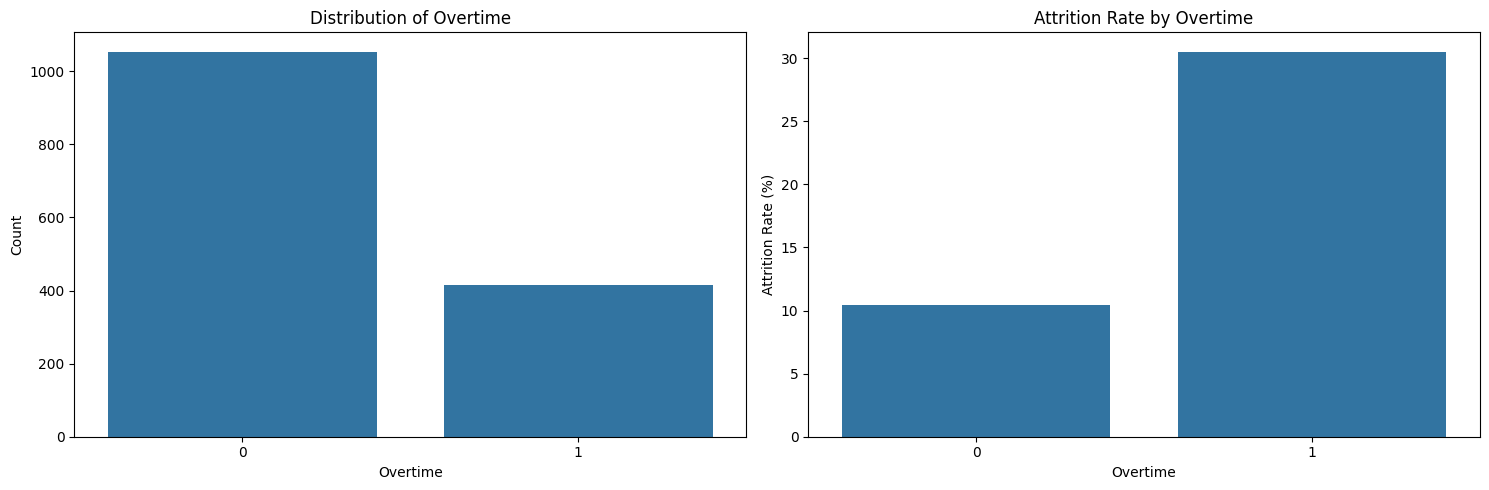


Overtime Summary:
-----------------
Total employees working overtime: 416
Percentage working overtime: 28.3%

Attrition rates:
Overtime employees: 30.5%
Non-overtime employees: 10.4%


In [60]:
# Analyze overtime distribution and its relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Overtime distribution
plt.subplot(1, 2, 1)
overtime_dist = df['Over_Time'].value_counts()
sns.barplot(x=overtime_dist.index, y=overtime_dist.values)
plt.title('Distribution of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Count')

# Plot 2: Overtime vs Attrition
plt.subplot(1, 2, 2)
overtime_attrition = pd.crosstab(df['Over_Time'], df['Attrition'], normalize='index') * 100
sns.barplot(x=overtime_attrition.index, y=overtime_attrition[1])
plt.title('Attrition Rate by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nOvertime Summary:")
print("-----------------")
print(f"Total employees working overtime: {len(df[df['Over_Time'] == 1])}")
print(f"Percentage working overtime: {len(df[df['Over_Time'] == 1]) / len(df) * 100:.1f}%")
print("\nAttrition rates:")
print(f"Overtime employees: {overtime_attrition.loc[1, 1]:.1f}%")
print(f"Non-overtime employees: {overtime_attrition.loc[0, 1]:.1f}%")


- Total employees working overtime: 416 out of 1,470 employees (approximately 28.3%) are working overtime. This indicates that a significant portion of the workforce is engaged in overtime, which could suggest high workloads or a culture of extended working hours.
- Attrition among overtime employees: 30.5% of employees who work overtime have left the company. This is notably high and suggests that overtime work may be a contributing factor to employee dissatisfaction or burnout.
- Attrition among non-overtime employees: In contrast, only 10.4% of employees who do not work overtime have left the company. This indicates a much lower turnover rate among those who maintain a standard work schedule.

### Marital Status

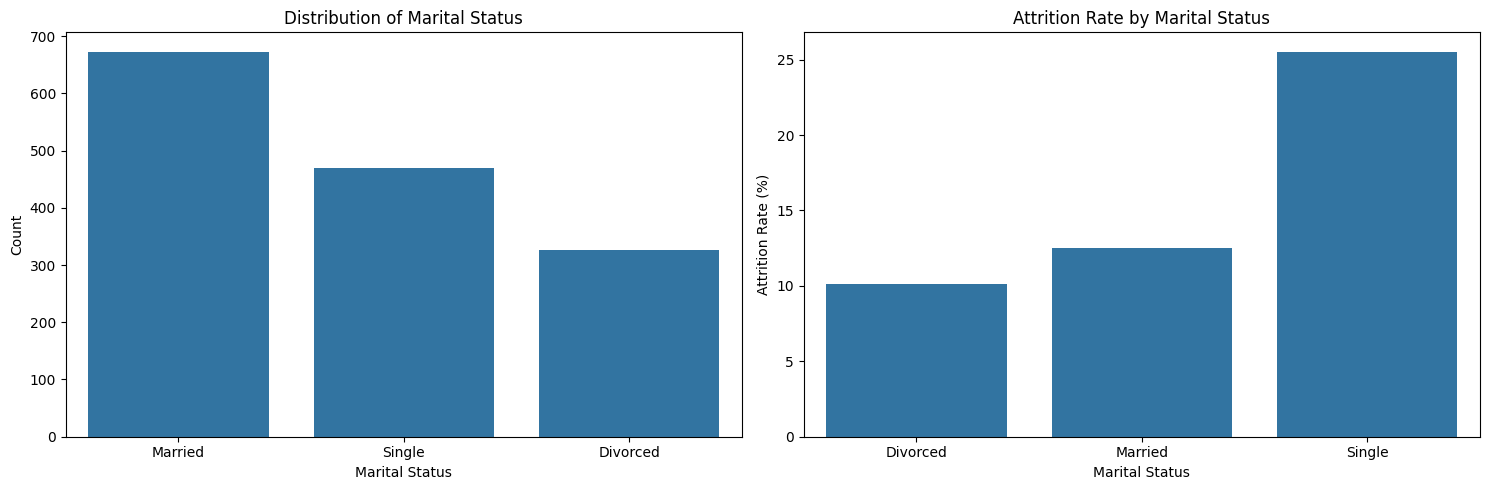


Marital Status Summary:
----------------------

Single:
Count: 470
Percentage: 32.0%
Attrition rate: 25.5%

Married:
Count: 673
Percentage: 45.8%
Attrition rate: 12.5%

Divorced:
Count: 327
Percentage: 22.2%
Attrition rate: 10.1%


In [61]:
# Analyze marital status distribution and its relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Marital Status distribution
plt.subplot(1, 2, 1)
marital_dist = df['MaritalStatus'].value_counts()
sns.barplot(x=marital_dist.index, y=marital_dist.values)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Plot 2: Marital Status vs Attrition
plt.subplot(1, 2, 2)
marital_attrition = pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100
sns.barplot(x=marital_attrition.index, y=marital_attrition[1])
plt.title('Attrition Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMarital Status Summary:")
print("----------------------")
for status in df['MaritalStatus'].unique():
    count = len(df[df['MaritalStatus'] == status])
    percentage = count / len(df) * 100
    attrition_rate = marital_attrition.loc[status, 1]
    print(f"\n{status}:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- Single Employees: The attrition rate for single employees is 25.5%. This is relatively high compared to the other groups, indicating that single employees may be more likely to leave the organization.
- Married Employees: The attrition rate for married employees is significantly lower at 12.5%. This suggests that married employees may have more stability or satisfaction in their roles, possibly due to family commitments or support systems.
- Divorced Employees: The attrition rate for divorced employees is 10.1%, which is the lowest among the three groups. This could indicate that divorced employees may have adjusted to their circumstances and are more focused on job stability.

### Job Role

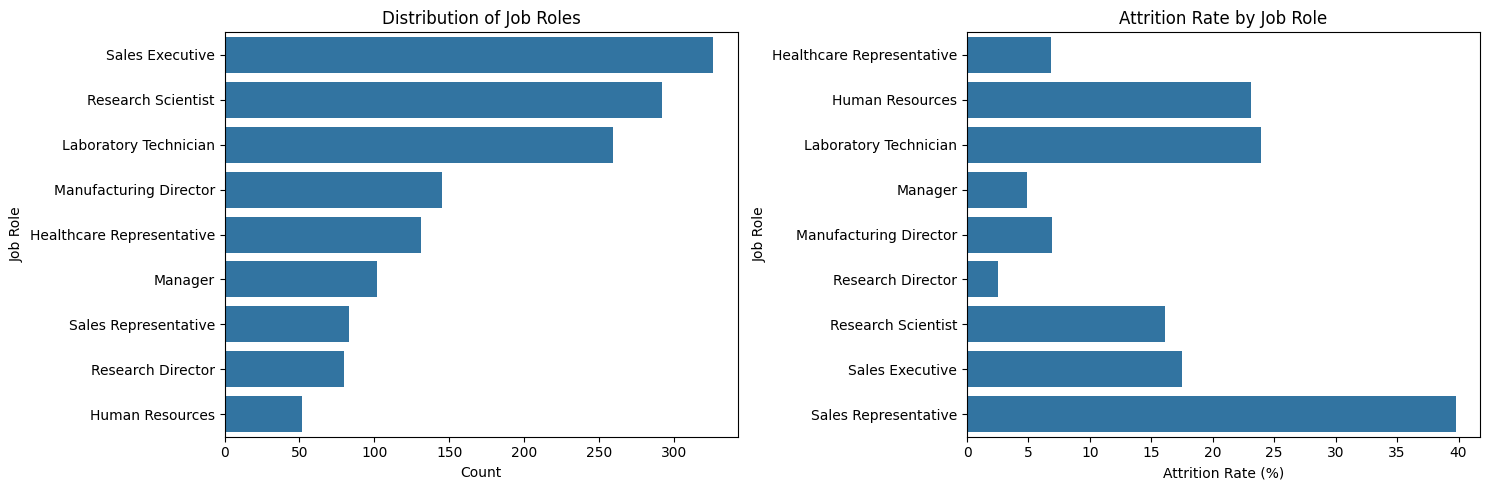


Job Role Summary:
----------------

Sales Executive:
Count: 326
Percentage: 22.2%
Attrition rate: 17.5%

Research Scientist:
Count: 292
Percentage: 19.9%
Attrition rate: 16.1%

Laboratory Technician:
Count: 259
Percentage: 17.6%
Attrition rate: 23.9%

Manufacturing Director:
Count: 145
Percentage: 9.9%
Attrition rate: 6.9%

Healthcare Representative:
Count: 131
Percentage: 8.9%
Attrition rate: 6.9%

Manager:
Count: 102
Percentage: 6.9%
Attrition rate: 4.9%

Sales Representative:
Count: 83
Percentage: 5.6%
Attrition rate: 39.8%

Research Director:
Count: 80
Percentage: 5.4%
Attrition rate: 2.5%

Human Resources:
Count: 52
Percentage: 3.5%
Attrition rate: 23.1%


In [62]:
# Analyze job role distribution and its relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Job Role distribution
plt.subplot(1, 2, 1)
job_dist = df['Job_Role'].value_counts()
sns.barplot(x=job_dist.values, y=job_dist.index)
plt.title('Distribution of Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')

# Plot 2: Job Role vs Attrition
plt.subplot(1, 2, 2)
job_attrition = pd.crosstab(df['Job_Role'], df['Attrition'], normalize='index') * 100
sns.barplot(x=job_attrition[1], y=job_attrition.index)
plt.title('Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nJob Role Summary:")
print("----------------")
for role in df['Job_Role'].unique():
    count = len(df[df['Job_Role'] == role])
    percentage = count / len(df) * 100
    attrition_rate = job_attrition.loc[role, 1]
    print(f"\n{role}:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- The data suggests that certain roles, particularly Sales Representatives and Laboratory Technicians, experience significantly higher attrition rates. This could indicate job dissatisfaction, high stress, or a lack of career advancement opportunities in these positions.
 
- Conversely, roles such as Research Director and Manager show very low attrition rates, indicating that employees in these positions may feel more satisfied and secure in their roles.

### Education Field

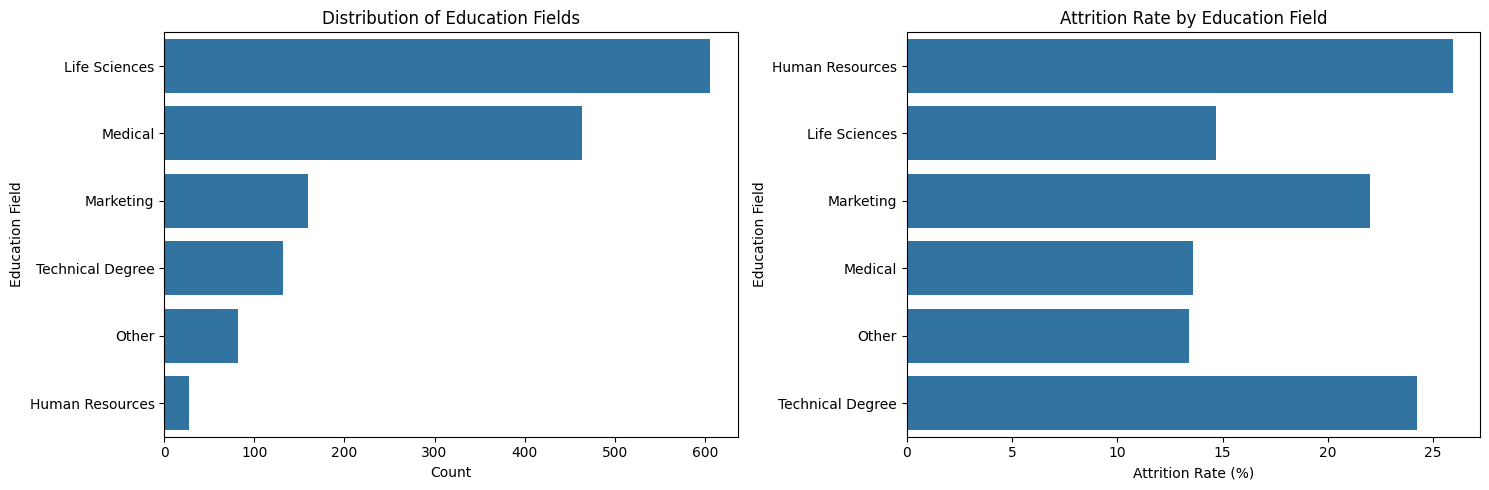


Education Field Summary:
----------------------

Life Sciences:
Count: 606
Percentage: 41.2%
Attrition rate: 14.7%

Other:
Count: 82
Percentage: 5.6%
Attrition rate: 13.4%

Medical:
Count: 464
Percentage: 31.6%
Attrition rate: 13.6%

Marketing:
Count: 159
Percentage: 10.8%
Attrition rate: 22.0%

Technical Degree:
Count: 132
Percentage: 9.0%
Attrition rate: 24.2%

Human Resources:
Count: 27
Percentage: 1.8%
Attrition rate: 25.9%


In [63]:
# Analyze education field distribution and its relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Education Field distribution
plt.subplot(1, 2, 1)
edu_dist = df['Education_Field'].value_counts()
sns.barplot(x=edu_dist.values, y=edu_dist.index)
plt.title('Distribution of Education Fields')
plt.xlabel('Count')
plt.ylabel('Education Field')

# Plot 2: Education Field vs Attrition
plt.subplot(1, 2, 2)
edu_attrition = pd.crosstab(df['Education_Field'], df['Attrition'], normalize='index') * 100
sns.barplot(x=edu_attrition[1], y=edu_attrition.index)
plt.title('Attrition Rate by Education Field')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Education Field')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nEducation Field Summary:")
print("----------------------")
for field in df['Education_Field'].unique():
    count = len(df[df['Education_Field'] == field])
    percentage = count / len(df) * 100
    attrition_rate = edu_attrition.loc[field, 1]
    print(f"\n{field}:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- The data suggests that employees with degrees in Marketing and Technical fields experience higher attrition rates. This could indicate job dissatisfaction, high stress, or a lack of career advancement opportunities in these areas.
- Conversely, employees in Life Sciences and Medical fields show lower attrition rates, suggesting that these roles may offer more job satisfaction or stability.

### Department

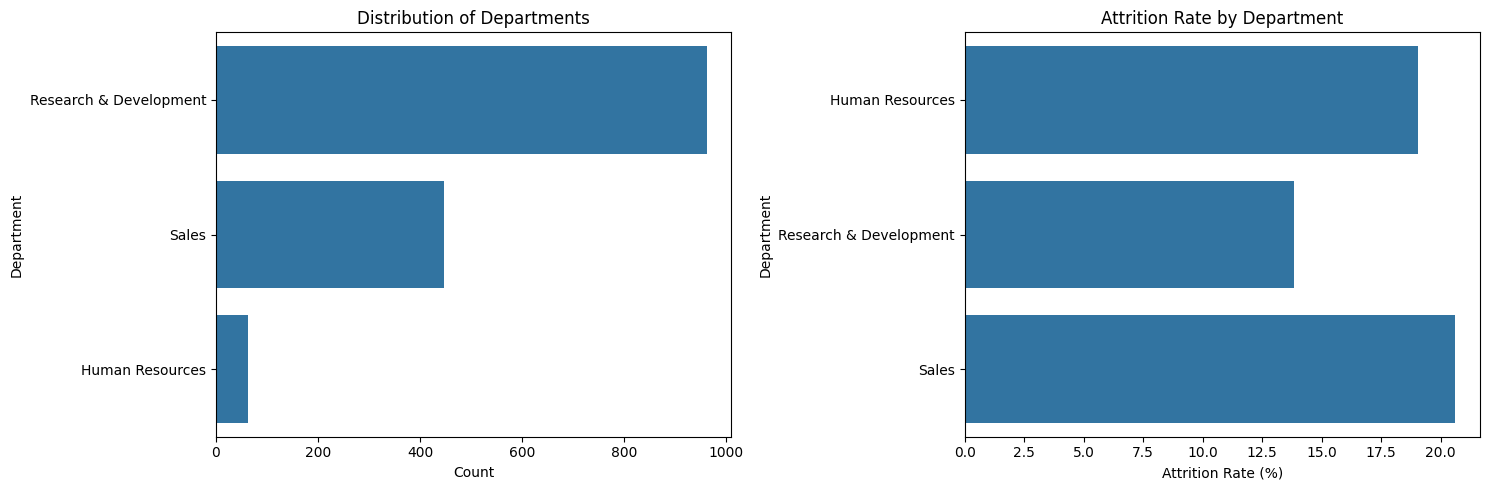


Department Summary:
------------------

Sales:
Count: 446
Percentage: 30.3%
Attrition rate: 20.6%

Research & Development:
Count: 961
Percentage: 65.4%
Attrition rate: 13.8%

Human Resources:
Count: 63
Percentage: 4.3%
Attrition rate: 19.0%


In [64]:
# Analyze department distribution and its relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Department distribution
plt.subplot(1, 2, 1)
dept_dist = df['Department'].value_counts()
sns.barplot(x=dept_dist.values, y=dept_dist.index)
plt.title('Distribution of Departments')
plt.xlabel('Count')
plt.ylabel('Department')

# Plot 2: Department vs Attrition
plt.subplot(1, 2, 2)
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
sns.barplot(x=dept_attrition[1], y=dept_attrition.index)
plt.title('Attrition Rate by Department')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Department')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDepartment Summary:")
print("------------------")
for dept in df['Department'].unique():
    count = len(df[df['Department'] == dept])
    percentage = count / len(df) * 100
    attrition_rate = dept_attrition.loc[dept, 1]
    print(f"\n{dept}:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- The high attrition rate in the Sales department may indicate a need for improved employee engagement, support, and career development opportunities. Sales roles can be particularly demanding, and high turnover may impact team performance and morale.
- The relatively low attrition rate in Research & Development suggests that employees in this department may feel more satisfied and secure in their roles, possibly due to a supportive work environment or opportunities for innovation and growth.

### Business Travel

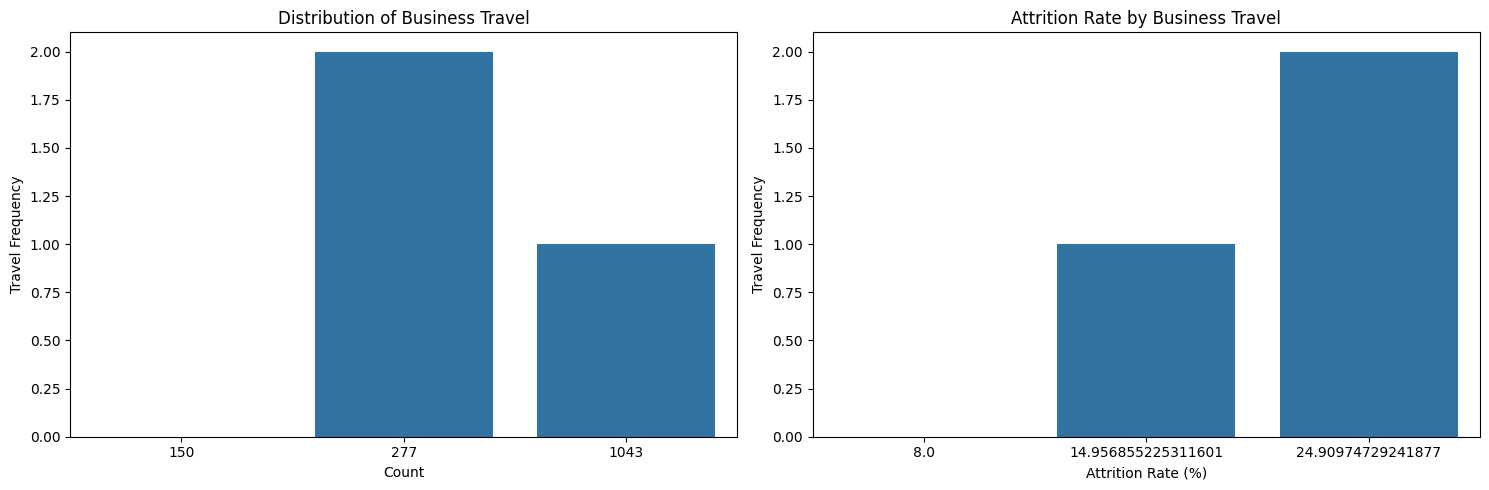


Business Travel Summary:
----------------------

1:
Count: 1043
Percentage: 71.0%
Attrition rate: 15.0%

2:
Count: 277
Percentage: 18.8%
Attrition rate: 24.9%

0:
Count: 150
Percentage: 10.2%
Attrition rate: 8.0%


In [65]:
# Analyze business travel patterns and their relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Business Travel distribution
plt.subplot(1, 2, 1)
travel_dist = df['Business_Travel'].value_counts()
sns.barplot(x=travel_dist.values, y=travel_dist.index)
plt.title('Distribution of Business Travel')
plt.xlabel('Count')
plt.ylabel('Travel Frequency')

# Plot 2: Business Travel vs Attrition
plt.subplot(1, 2, 2)
travel_attrition = pd.crosstab(df['Business_Travel'], df['Attrition'], normalize='index') * 100
sns.barplot(x=travel_attrition[1], y=travel_attrition.index)
plt.title('Attrition Rate by Business Travel')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Travel Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBusiness Travel Summary:")
print("----------------------")
for travel in df['Business_Travel'].unique():
    count = len(df[df['Business_Travel'] == travel])
    percentage = count / len(df) * 100
    attrition_rate = travel_attrition.loc[travel, 1]
    print(f"\n{travel}:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- Travel Rarely: The attrition rate is 15.0%. This indicates a moderate level of turnover among employees who travel infrequently, suggesting that while they are relatively stable, there is still a notable risk of losing these employees.
- Travel Frequently: The attrition rate is 24.9%, which is significantly higher than that of employees who travel rarely. This suggests that frequent travelers may experience higher levels of stress, work-life imbalance, or job dissatisfaction, leading to a greater likelihood of leaving the organization.
- Non-Travel: The attrition rate is 8.0%, which is the lowest among the three categories. This indicates that employees who do not travel for work are the most stable group, possibly due to fewer job-related stresses associated with travel.

### Relation between Overtime and Age

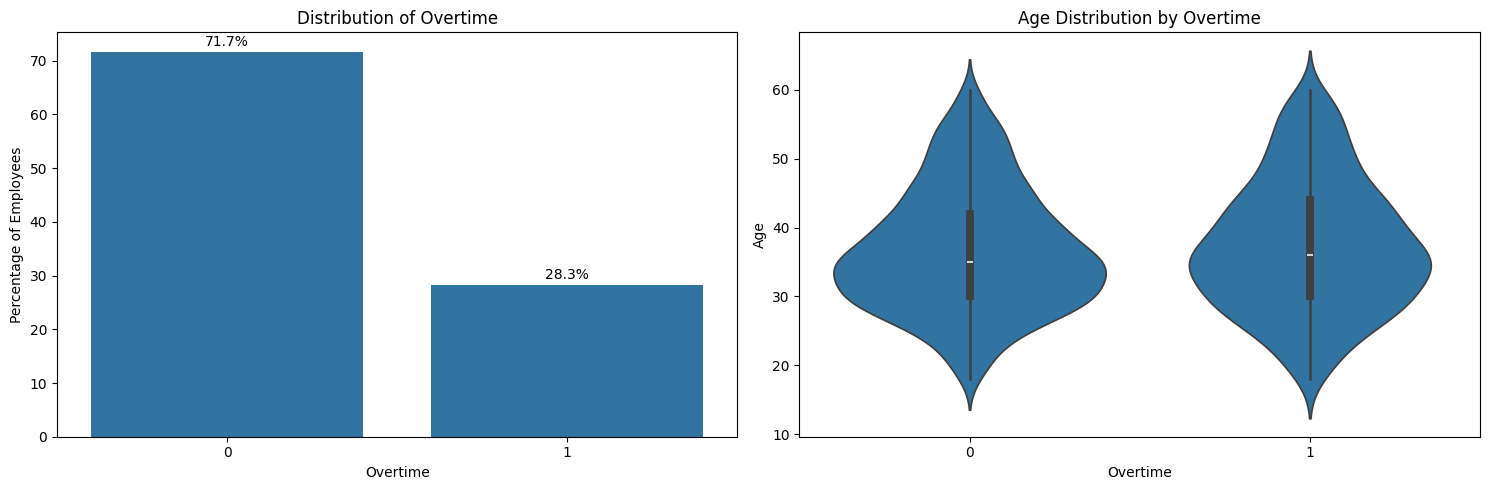


Overtime and Age Analysis:
-------------------------

Overall Statistics:
Total employees: 1470
Average age: 36.9

1 Overtime Group:
Number of employees: 416 (28.3%)

Age Distribution:
Mean age: 37.3
Median age: 36.0
Age range: 18 - 60

Age Group Breakdown:
Under 25: 39 (9.4%)
25-35: 159 (38.2%)
35-45: 135 (32.5%)
Over 45: 83 (20.0%)

0 Overtime Group:
Number of employees: 1054 (71.7%)

Age Distribution:
Mean age: 36.8
Median age: 35.0
Age range: 18 - 60

Age Group Breakdown:
Under 25: 84 (8.0%)
25-35: 447 (42.4%)
35-45: 333 (31.6%)
Over 45: 190 (18.0%)


In [76]:
# Analyze overtime patterns across age groups using visualization and descriptive statistics
plt.figure(figsize=(15, 5))

# Plot 1: Overtime distribution with percentages
plt.subplot(1, 2, 1)
overtime_dist = df['Over_Time'].value_counts()
overtime_pct = overtime_dist / len(df) * 100

sns.barplot(x=overtime_dist.index, y=overtime_pct)
plt.title('Distribution of Overtime')
plt.xlabel('Overtime')
plt.ylabel('Percentage of Employees')

for i, v in enumerate(overtime_pct):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

# Plot 2: Age distribution by overtime with violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Over_Time', y='Age', data=df)
plt.title('Age Distribution by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nOvertime and Age Analysis:")
print("-------------------------")

# Overall statistics
print("\nOverall Statistics:")
print(f"Total employees: {len(df)}")
print(f"Average age: {df['Age'].mean():.1f}")

# Overtime group analysis
for overtime in df['Over_Time'].unique():
    subset = df[df['Over_Time'] == overtime]
    count = len(subset)
    pct = count / len(df) * 100
    
    print(f"\n{overtime} Overtime Group:")
    print(f"Number of employees: {count} ({pct:.1f}%)")
    print("\nAge Distribution:")
    print(f"Mean age: {subset['Age'].mean():.1f}")
    print(f"Median age: {subset['Age'].median():.1f}")
    print(f"Age range: {subset['Age'].min():.0f} - {subset['Age'].max():.0f}")
    
    # Age group breakdown
    age_bins = [0, 25, 35, 45, 100]
    age_labels = ['Under 25', '25-35', '35-45', 'Over 45']
    age_groups = pd.cut(subset['Age'], bins=age_bins, labels=age_labels)
    age_dist = age_groups.value_counts().sort_index()
    
    print("\nAge Group Breakdown:")
    for age_group, count in age_dist.items():
        pct = count / len(subset) * 100
        print(f"{age_group}: {count} ({pct:.1f}%)")


In [78]:
# Perform statistical tests to check relationship between overtime and age

# 1. Independent t-test to compare age means between overtime groups
from scipy import stats

overtime_yes = df[df['Over_Time'] == 1]['Age']
overtime_no = df[df['Over_Time'] == 0]['Age']

t_stat, p_value = stats.ttest_ind(overtime_yes, overtime_no)

print("\nStatistical Analysis of Overtime and Age Relationship:")
print("----------------------------------------------------")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("\nThere is a statistically significant difference in age between overtime groups")
else:
    print("\nNo statistically significant difference in age between overtime groups")

# 2. Calculate correlation coefficient (point-biserial correlation)
correlation = stats.pointbiserialr(df['Over_Time'], df['Age'])

print(f"\nPoint-biserial correlation coefficient: {correlation.correlation:.3f}")
print(f"Correlation p-value: {correlation.pvalue:.3f}")

if abs(correlation.correlation) > 0.3:
    strength = "strong"
elif abs(correlation.correlation) > 0.1:
    strength = "weak"
else:
    strength = "very weak"

print(f"\nThere is a {strength} correlation between age and overtime")

# 3. Effect size calculation (Cohen's d)
mean_diff = overtime_yes.mean() - overtime_no.mean()
pooled_std = np.sqrt((overtime_yes.var() + overtime_no.var()) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nCohen's d effect size: {cohens_d:.3f}")
if abs(cohens_d) > 0.8:
    effect = "large"
elif abs(cohens_d) > 0.5:
    effect = "medium"
elif abs(cohens_d) > 0.2:
    effect = "small"
else:
    effect = "negligible"

print(f"This indicates a {effect} effect size")



Statistical Analysis of Overtime and Age Relationship:
----------------------------------------------------
T-statistic: 1.076
P-value: 0.282

No statistically significant difference in age between overtime groups

Point-biserial correlation coefficient: 0.028
Correlation p-value: 0.282

There is a very weak correlation between age and overtime

Cohen's d effect size: 0.061
This indicates a negligible effect size


1. T-Statistic and P-Value:
- T-statistic: 1.076
- P-value: 0.282
    + The P-value indicates that there is no statistically significant difference in age between employees who work overtime and those who do not. Typically, a P-value below 0.05 is considered statistically significant, so a value of 0.282 suggests that any observed differences in age are likely due to random chance rather than a true effect.

2. Point-Biserial Correlation:
- Point-biserial correlation coefficient: 0.028
- Correlation P-value: 0.282
    + The very low correlation coefficient (0.028) indicates that there is a very weak correlation between age and overtime. This means that age does not have a meaningful relationship with whether an employee works overtime.

3. Cohen's d Effect Size:
- Cohen's d: 0.061
    + This value indicates a negligible effect size, suggesting that the difference in age between the overtime groups is not practically significant. Cohen's d values below 0.2 are generally considered negligible.

**No Significant Age Impact:** The analysis suggests that age does not significantly influence whether employees work overtime. This could imply that factors other than age, such as job role, workload, or personal circumstances, may play a more critical role in determining overtime work.

### Total Working Years

In [79]:
# Create overtime groups
overtime_yes = df[df['Over_Time'] == 1]['Total_Working_Years']
overtime_no = df[df['Over_Time'] == 0]['Total_Working_Years']

# 1. T-test
t_stat, p_value = stats.ttest_ind(overtime_yes, overtime_no)
print("T-test Results:")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# 2. Point-biserial correlation
correlation, corr_p_value = stats.pointbiserialr(df['Over_Time'], df['Total_Working_Years'])
print("\nPoint-Biserial Correlation:")
print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {corr_p_value:.3f}")

# Interpret correlation strength
if abs(correlation) > 0.5:
    strength = "strong"
elif abs(correlation) > 0.3:
    strength = "moderate"
elif abs(correlation) > 0.1:
    strength = "weak"
else:
    strength = "very weak"

print(f"\nThere is a {strength} correlation between total working years and overtime")

# 3. Effect size calculation (Cohen's d)
mean_diff = overtime_yes.mean() - overtime_no.mean()
pooled_std = np.sqrt((overtime_yes.var() + overtime_no.var()) / 2)
cohens_d = mean_diff / pooled_std

print(f"\nCohen's d effect size: {cohens_d:.3f}")
if abs(cohens_d) > 0.8:
    effect = "large"
elif abs(cohens_d) > 0.5:
    effect = "medium"
elif abs(cohens_d) > 0.2:
    effect = "small"
else:
    effect = "negligible"

print(f"This indicates a {effect} effect size")


T-test Results:
T-statistic: 0.489
P-value: 0.625

Point-Biserial Correlation:
Correlation coefficient: 0.013
P-value: 0.625

There is a very weak correlation between total working years and overtime

Cohen's d effect size: 0.028
This indicates a negligible effect size


Total Working Years is also doesn't have a big of much correlation with Overtime

### Education Level

Attrition rates by education level:
           count      mean
Education                 
1            170  0.182353
2            282  0.156028
3            572  0.173077
4            398  0.145729
5             48  0.104167

Chi-square test results:
Chi-square statistic: 3.074
p-value: 0.546

Cramer's V: 0.046
This indicates a negligible association between education level and attrition


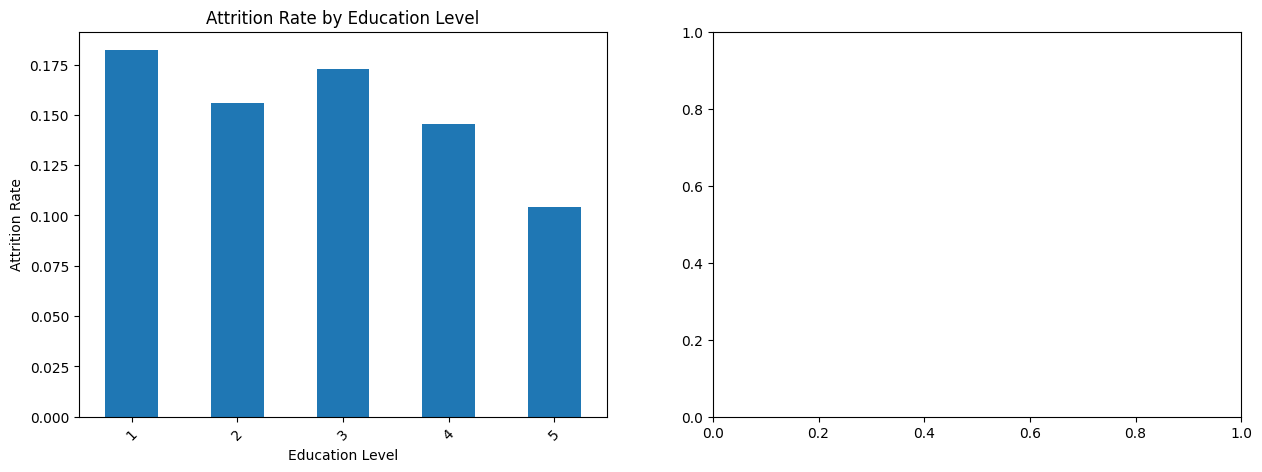

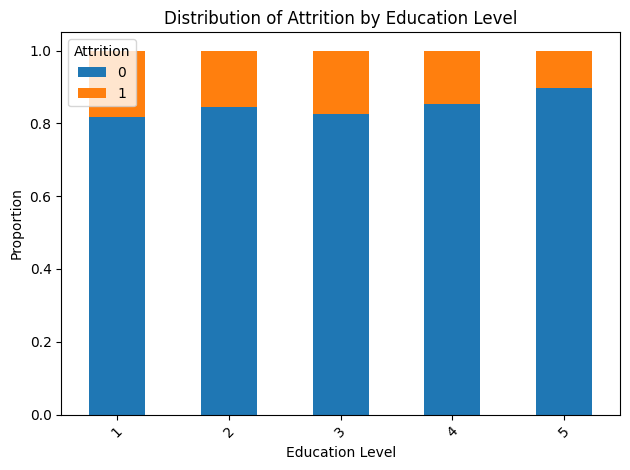

In [80]:
# 1. Descriptive statistics by education level
education_stats = df.groupby('Education')['Attrition'].agg(['count', 'mean'])
print("Attrition rates by education level:")
print(education_stats)

# Chi-square test of independence
contingency_table = pd.crosstab(df['Education'], df['Attrition'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3f}")

# Calculate Cramer's V
n = len(df)
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"\nCramer's V: {cramer_v:.3f}")

# Interpret effect size
if cramer_v > 0.35:
    effect = "strong"
elif cramer_v > 0.21:
    effect = "moderate"
elif cramer_v > 0.11:
    effect = "weak"
else:
    effect = "negligible"

print(f"This indicates a {effect} association between education level and attrition")

# Visualize relationship
plt.figure(figsize=(15, 5))

# Plot 1: Attrition rate by education level
plt.subplot(1, 2, 1)
education_stats['mean'].plot(kind='bar')
plt.title('Attrition Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)

# Plot 2: Distribution of education levels by attrition
plt.subplot(1, 2, 2)
pd.crosstab(df['Education'], df['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Distribution of Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Attrition')

plt.tight_layout()
plt.show()


No Significant Impact of Education Level: The analysis suggests that education level does not significantly influence attrition rates. Employees across different education levels exhibit similar turnover patterns, indicating that factors other than education may be more critical in determining attrition.

### Number of Companies Worked

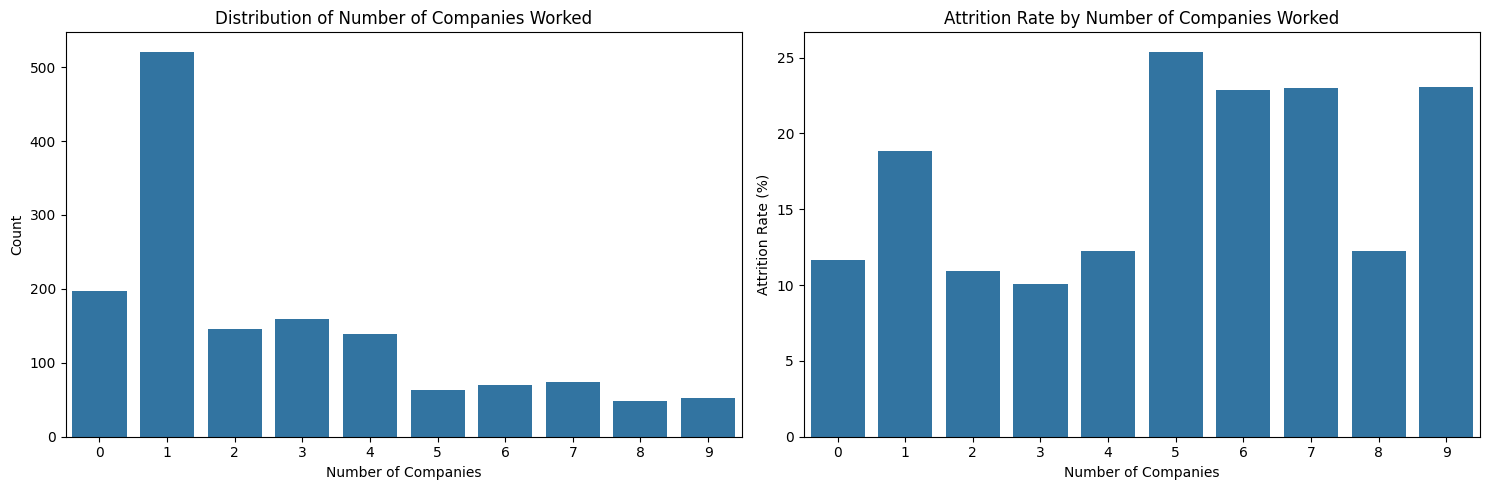


Number of Companies Worked Summary:
----------------------------------

0 companies:
Count: 197
Percentage: 13.4%
Attrition rate: 11.7%

1 companies:
Count: 521
Percentage: 35.4%
Attrition rate: 18.8%

2 companies:
Count: 146
Percentage: 9.9%
Attrition rate: 11.0%

3 companies:
Count: 159
Percentage: 10.8%
Attrition rate: 10.1%

4 companies:
Count: 139
Percentage: 9.5%
Attrition rate: 12.2%

5 companies:
Count: 63
Percentage: 4.3%
Attrition rate: 25.4%

6 companies:
Count: 70
Percentage: 4.8%
Attrition rate: 22.9%

7 companies:
Count: 74
Percentage: 5.0%
Attrition rate: 23.0%

8 companies:
Count: 49
Percentage: 3.3%
Attrition rate: 12.2%

9 companies:
Count: 52
Percentage: 3.5%
Attrition rate: 23.1%


In [83]:
# Analyze number of companies worked patterns and their relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Number of Companies Worked distribution
plt.subplot(1, 2, 1)
companies_dist = df['Num_Companies_Worked'].value_counts()
sns.barplot(x=companies_dist.index, y=companies_dist.values)
plt.title('Distribution of Number of Companies Worked')
plt.xlabel('Number of Companies')
plt.ylabel('Count')

# Plot 2: Number of Companies vs Attrition
plt.subplot(1, 2, 2)
companies_attrition = pd.crosstab(df['Num_Companies_Worked'], df['Attrition'], normalize='index') * 100
sns.barplot(x=companies_attrition.index, y=companies_attrition[1])
plt.title('Attrition Rate by Number of Companies Worked')
plt.xlabel('Number of Companies')
plt.ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nNumber of Companies Worked Summary:")
print("----------------------------------")
for num_companies in sorted(df['Num_Companies_Worked'].unique()):
    count = len(df[df['Num_Companies_Worked'] == num_companies])
    percentage = count / len(df) * 100
    attrition_rate = companies_attrition.loc[num_companies, 1]
    print(f"\n{num_companies} companies:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- Higher Attrition with More Job Changes: The data suggests that employees who have worked for five or more companies have significantly higher attrition rates. This could indicate that these employees are more likely to be dissatisfied with their current roles or are actively seeking better opportunities
- Moderate Stability for Fewer Job Changes: Employees with 0, 2, or 3 previous companies show lower attrition rates, indicating that those with fewer job changes may be more stable and satisfied in their current roles.
- Potential for Job Hopping: The higher attrition rates among employees with one previous job and those with multiple job changes suggest a potential trend of job hopping, which may be influenced by factors such as career advancement opportunities, job satisfaction, or work-life balance.

### Distance from Home

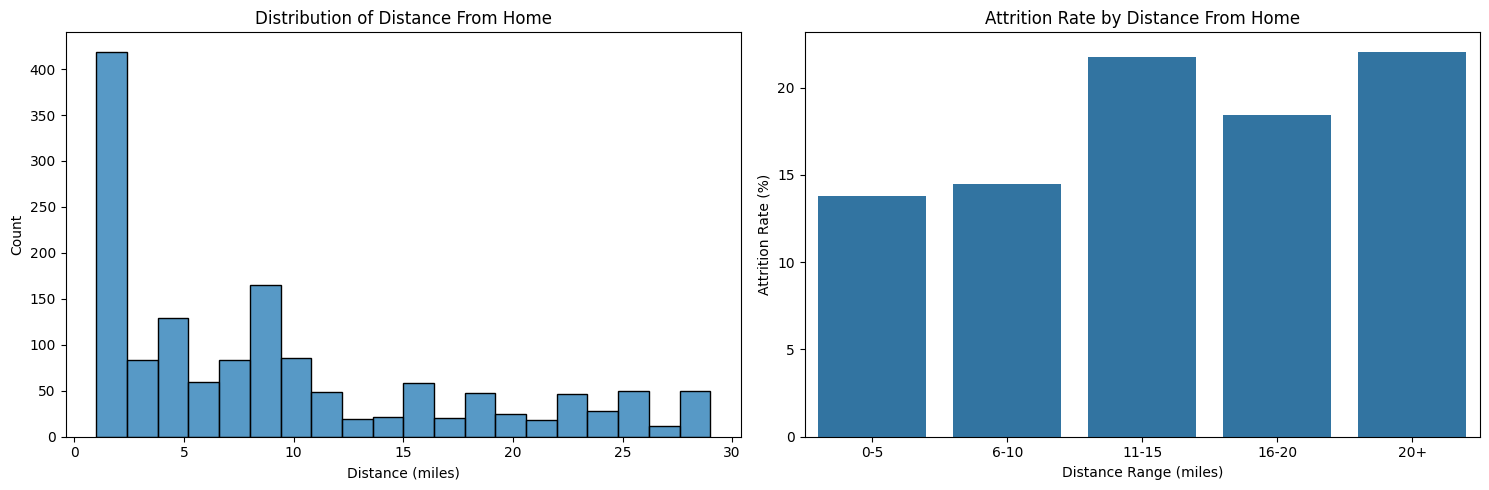


Distance From Home Summary:
-------------------------

Overall Statistics:
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: Distance_From_Home, dtype: float64

Attrition Rates by Distance Group:

0-5 miles:
Count: 632
Percentage: 43.0%
Attrition rate: 13.8%

6-10 miles:
Count: 394
Percentage: 26.8%
Attrition rate: 14.5%

11-15 miles:
Count: 115
Percentage: 7.8%
Attrition rate: 21.7%

16-20 miles:
Count: 125
Percentage: 8.5%
Attrition rate: 18.4%

20+ miles:
Count: 204
Percentage: 13.9%
Attrition rate: 22.1%


In [84]:
# Analyze distance from home patterns and their relationship with attrition
plt.figure(figsize=(15, 5))

# Plot 1: Distance From Home distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Distance_From_Home', bins=20)
plt.title('Distribution of Distance From Home')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')

# Plot 2: Average Attrition Rate by Distance Groups
plt.subplot(1, 2, 2)
df['Distance_Group'] = pd.cut(df['Distance_From_Home'], 
                            bins=[0, 5, 10, 15, 20, 30],
                            labels=['0-5', '6-10', '11-15', '16-20', '20+'])
distance_attrition = pd.crosstab(df['Distance_Group'], df['Attrition'], normalize='index') * 100
sns.barplot(x=distance_attrition.index, y=distance_attrition[1])
plt.title('Attrition Rate by Distance From Home')
plt.xlabel('Distance Range (miles)')
plt.ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDistance From Home Summary:")
print("-------------------------")
print(f"\nOverall Statistics:")
print(df['Distance_From_Home'].describe())

print("\nAttrition Rates by Distance Group:")
for group in distance_attrition.index:
    count = len(df[df['Distance_Group'] == group])
    percentage = count / len(df) * 100
    attrition_rate = distance_attrition.loc[group, 1]
    print(f"\n{group} miles:")
    print(f"Count: {count}")
    print(f"Percentage: {percentage:.1f}%")
    print(f"Attrition rate: {attrition_rate:.1f}%")


- Distance and Attrition Correlation: The data suggests a correlation between distance from home and attrition rates. Employees who live further away from the workplace tend to have higher attrition rates, which may indicate that long commutes contribute to job dissatisfaction or burnout.
- Potential for Increased Turnover: The higher attrition rates for employees living 11 miles or more from the workplace highlight the need for organizations to consider the impact of commuting on employee retention. Long commutes can lead to increased stress and reduced work-life balance.


## **Conclusions**

**Strong Correlations**

1.	Job Level and Monthly Income (0.95):
Employees in higher job levels earn significantly more than those in lower levels, reflecting a structured compensation framework tied to job responsibilities and seniority.
2.	Years at Company and Years with Current Manager (0.77):
Long-tenured employees tend to stay with the same manager for extended periods, emphasizing the importance of manager-employee relationships in retention.
3.	Total Working Years and Job Level (0.78):
Career progression is closely tied to overall work experience, highlighting the value of experience in determining promotions and job levels.
4.	Total Working Years and Monthly Income (0.77):
More experienced employees tend to earn higher salaries, reinforcing the link between tenure, expertise, and pay growth.


**Moderate Correlations**

1.	Age and Total Working Years (0.68):
Older employees generally have more work experience, which is expected given the natural progression of careers over time.
2.	Years at Company and Years Since Last Promotion (0.62):
Employees with longer tenures tend to have gone longer without a promotion, suggesting potential stagnation for long-term employees.
3.	Years Since Last Promotion and Years in Current Role (0.55):
Employees who have not been promoted for extended periods often remain in their current roles, potentially indicating a lack of upward mobility or opportunity.

**Attrition Insights**

1.	Impact of Overtime:
    + Higher Attrition Among Overtime Workers:
    + Employees working overtime exhibit a significantly higher attrition rate (30.5%) compared to those not working overtime (10.4%). This suggests that extended work hours may contribute to dissatisfaction or burnout.

2. Marital Status and Attrition:
    + Single employees have the highest attrition rate (25.5%), while divorced employees have the lowest (10.1%). Married employees show moderate stability (12.5%).

3. Role-Specific Attrition:
    + Sales Representatives and Laboratory Technicians show high turnover rates, indicating potential dissatisfaction or stress in these roles.
    + Research Directors and Managers have low attrition, suggesting higher satisfaction and job security.

4. Education and Attrition:
    + Higher attrition is observed among employees with Marketing and Technical backgrounds, while Life Sciences and Medical fields show lower turnover.

5. Departmental Insights:
    + Sales experiences high turnover, potentially due to demanding roles or lack of growth opportunities.
    + Research & Development shows lower attrition, indicating a supportive and engaging work environment.

6. Travel and Attrition:
    + Frequent travelers (24.9%) experience higher attrition compared to those who travel rarely (15.0%) or not at all (8.0%).

7. Job Changes and Attrition:
    + Employees with five or more previous jobs exhibit higher attrition, indicating potential job-hopping tendencies.

8. Distance from Work:
    + Higher attrition rates are observed for employees living further from the workplace, particularly those residing more than 11 miles away.

**Statistical Findings**
1.	Age and Overtime:
    + No statistically significant relationship exists between age and overtime (P-value = 0.282).
2. Education Level and Attrition:
    + Education level does not significantly impact attrition, suggesting that other factors, such as job satisfaction and career growth, play a more critical role.



**Overall Conclusion**
1.	**Structured Growth:** Strong correlations between job level, income, and tenure indicate that experience drives career progression and compensation.
2.	**High-Risk Groups:** Employees working overtime, in Sales roles, or frequently traveling show higher attrition rates due to burnout, job dissatisfaction, or work-life imbalance.
3.	**Promotion Stagnation:** Long-tenured employees may feel stuck, as years at the company correlate with time since the last promotion.
4.	**Commute Impact:** Employees living further away have higher turnover, highlighting the stress of long commutes.
5.	**Stable Areas:** Research & Development, managerial roles, and non-traveling employees exhibit low attrition, suggesting job satisfaction and stability in these groups.
6.	**Minimal Impact of Education:** Education level and age have little influence on attrition, with other factors playing a more critical role.


## **Reccomendations**



- **Career Development:**
    + Address promotion gaps and career stagnation for long-tenured employees by creating clear pathways for advancement.
- **Workload and Overtime:**
    + Reduce reliance on overtime to mitigate burnout and support employee well-being.
- **Targeted Retention Programs:**
    + Focus on high-turnover roles (e.g., Sales Representatives) and groups (e.g., single employees, frequent travelers) with tailored strategies to improve engagement and retention.
- **Support for Long Commutes:**
    + Offer flexible schedules or remote work options to employees with lengthy commutes to enhance work-life balance.
